# Intrinsic optical imaging results

In [1]:
import Inflow
Inflow.logging.enable_logging(level = "INFO")
import one
from ResearchProjects import adaptation
from ResearchProjects.adaptation import aliases as alias
import pImage
import matplotlib.pyplot as plt, pandas as pd, numpy as np, os
logger = Inflow.logging.get_local_logger("main")
import logging
import time

In [2]:
def sci_imshow(image, *, ax = None, 
               vmin = None, 
               vmax = None, 
               cmap = None , 
               cbar_label = None,
               sci_notation = True,
               show_scale = True,
               ticks_nb = 2,
               title = None,
               **cbar_kwargs):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    from matplotlib.ticker import MaxNLocator
    if ax is None :
        fig, ax = plt.subplots()
    im = ax.imshow( image, vmin = vmin , vmax = vmax , cmap = cmap )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax, label = cbar_label, **cbar_kwargs)
    cbar.outline.set_visible(False)
    cbar.ax.yaxis.set_major_locator(MaxNLocator(nbins = ticks_nb, integer=True))
    if sci_notation :
        cbar.formatter.set_powerlimits((0, 0))
    if show_scale : 
        Inflow.plots.utils.add_scalebar(ax, matchy = False, labelx = "pixels" , borderpad = 1)
    else :
        Inflow.plots.utils.clarify_image_ax(ax)
    ax.set_title(title)
    return ax
    

In [150]:
def IOI_plot(IOI_data , whisker , session_label,
            vmin = -0.001,
            vmax = 0.0005,
            use_difference = True,
            min_center = None,
            exlude = None,
            include = None):
    #TODO : IMPLEMENT whisker , session_details correctly
    from Inflow.signal.filters import gaussian
    
    nostim , stim = IOI_data["nostim_baseline_substracted"] , IOI_data["stim_baseline_substracted"]
    
    if exlude is not None :
        keeplist = [True] * nostim.shape[0]
        for value in exlude :
            keeplist[value] = False
    elif include is not None :
        keeplist = [False] * nostim.shape[0]
        for value in include :
            keeplist[value] = True
    else :
        keeplist = [True] * nostim.shape[0]

    keeplist = np.array(keeplist,dtype = bool)

    nostim = nostim[keeplist,:]
    stim = stim[keeplist,:]
        
    mean_nostim = nostim.mean(axis = 0)
    mean_stim = stim.mean(axis = 0)
    if use_difference :
        diff = mean_stim - mean_nostim
    else :
        diff = mean_stim
    gauss_diff = gaussian(diff, sigma = 5 , axis = [0,1])
    
    if min_center is None :
        min_center = np.unravel_index(np.argmin(gauss_diff), gauss_diff.shape)
        min_center = (min_center[1],min_center[0])
        
    fig, axes = plt.subplots(2,2, figsize = (10,10))

    sci_imshow(mean_nostim, ax = axes[0,0] , title = "No Stim" , cmap = 'hot_r' , vmin = vmin , vmax = vmax)
    sci_imshow(mean_stim, ax = axes[0,1] , title = "Stim", cbar_label = "Amplitude (A.U.)", cmap = 'hot_r', vmin = vmin , vmax = vmax , show_scale = False )
    gs = axes[1,1].get_gridspec()
    axes[1,0].remove()
    axes[1,1].remove()
    axbig = fig.add_subplot(gs[1,:])
    sci_imshow(gauss_diff, ax = axbig, title = "Difference (gaussian + min point)", cbar_label = "Amplitude (A.U.)", cmap = 'hot_r', vmin = vmin , vmax = vmax , show_scale = False)
    fig.suptitle(f"IOI {session_label} - whisker {whisker}")
    axbig.plot(*min_center, "o", markersize = 5)
    fig.center = min_center
    return fig

In [89]:
def show_all_sweeps(sweeps_array, whisker, session_label, label = ""):
    import math
    len(sweeps_array)

    side_size = math.sqrt(len(sweeps_array))
    side_size = int(np.ceil(side_size))
    
    fig, axes = plt.subplots(side_size , side_size )
    row = 0
    for index, array in enumerate(sweeps_array):
        current = side_size * row
        if index - current > 4 :
            row = row + 1 
        current = side_size * row
        column = index - current
        axes[row, column].imshow(array, cmap = "hot_r")
        Inflow.plots.utils.clarify_image_ax(axes[row, column])
    for ax in axes.flatten():
        if len(ax.get_images()) == 0 : ax.remove()
    
    fig.suptitle(f"All {label} sweeps images\n{session_label} - whisker {whisker}")
    return fig

# Edit points if necessary

In [38]:
from ipywidgets import interact

data = Inflow.tdms.read(root.format(**{"whisker":"C1", "session" : session_label}),"data_as_sweeps" )
nostim , stim = data["nostim_baseline_substracted"] , data["stim_baseline_substracted"]
stim = stim.mean(axis = 0)

@interact
def test(x = (10,1000), y = (10,1000)):
    plt.imshow(stim, cmap = 'hot_r', vmin = -0.0025, vmax = 0.00015)
    plt.plot(x,y, 'o' , color = 'blue')
    plt.show()

interactive(children=(IntSlider(value=505, description='x', max=1000, min=10), IntSlider(value=505, descriptio…

# Make plots 

B1


C:\Users\tjostmou\AppData\Local\Temp\ipykernel_61700\2895428723.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


C1


C:\Users\tjostmou\AppData\Local\Temp\ipykernel_61700\2895428723.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


D1


C:\Users\tjostmou\AppData\Local\Temp\ipykernel_61700\2895428723.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\tjostmou\AppData\Local\Temp\ipykernel_61700\2895428723.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


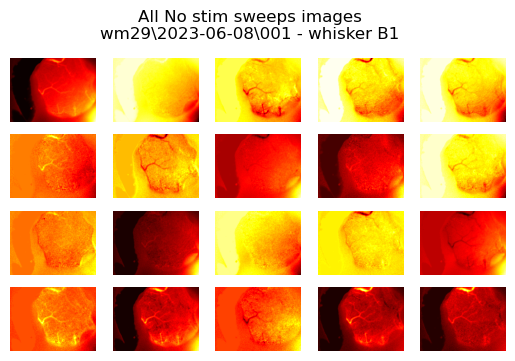

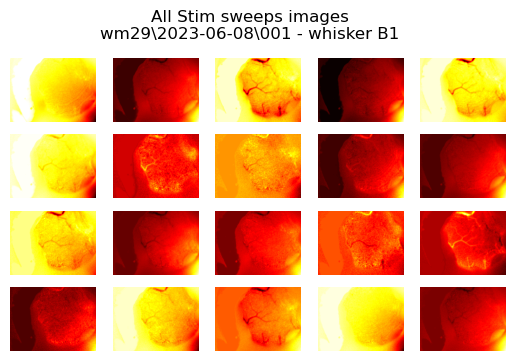

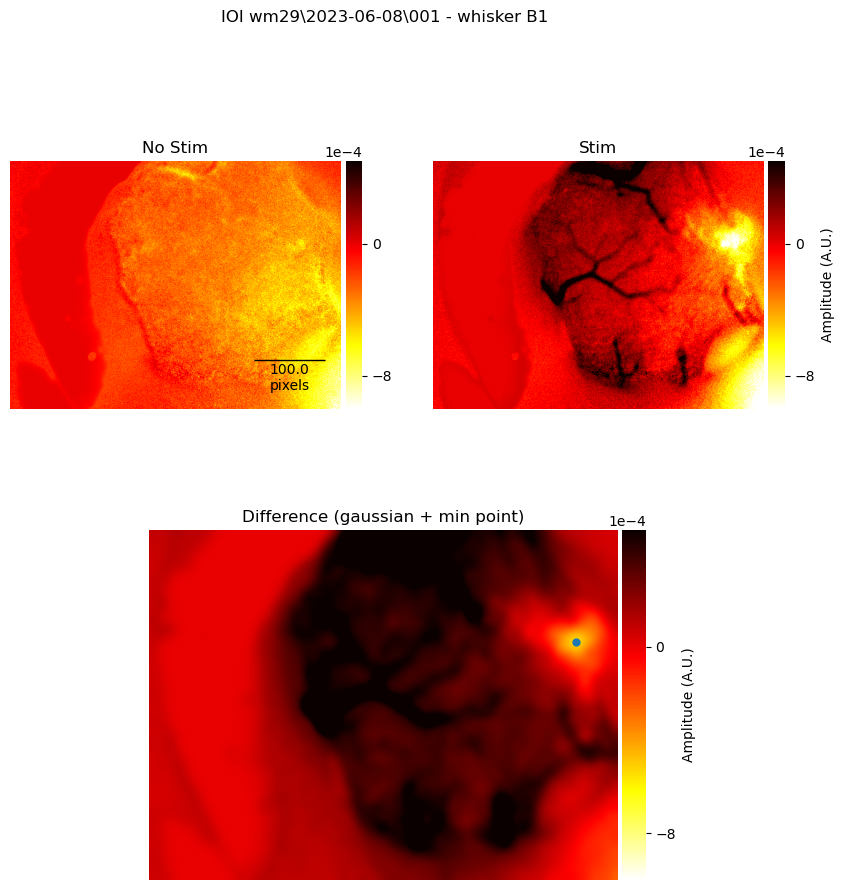

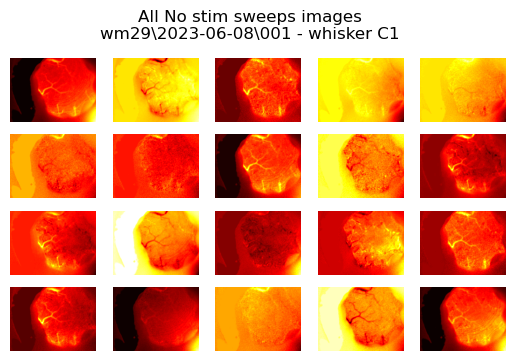

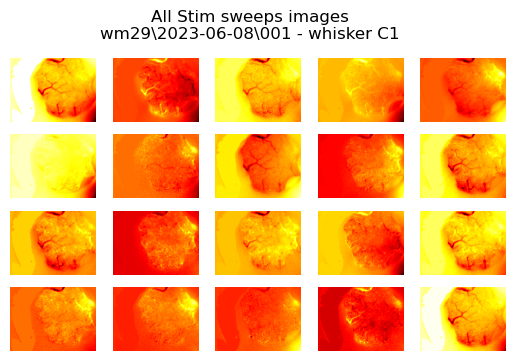

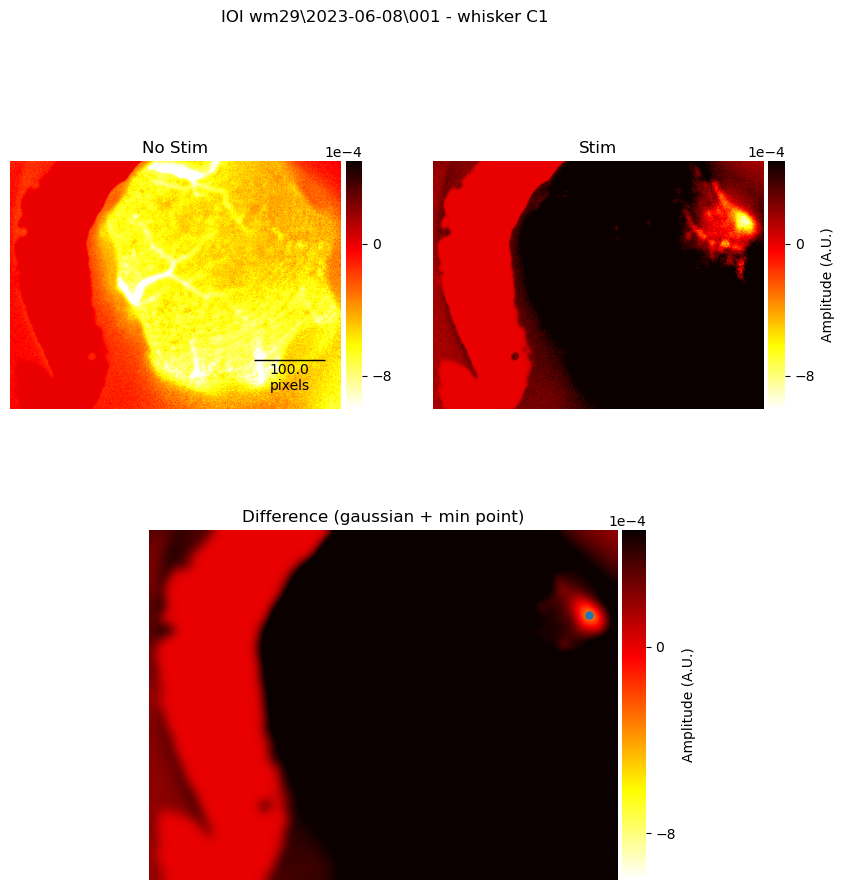

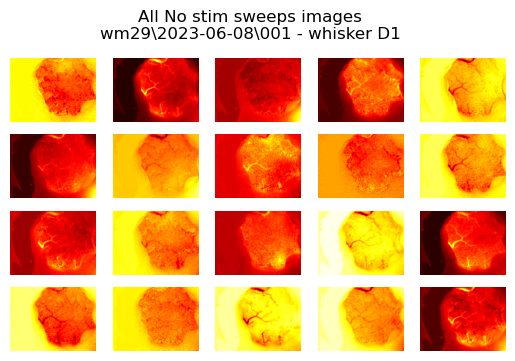

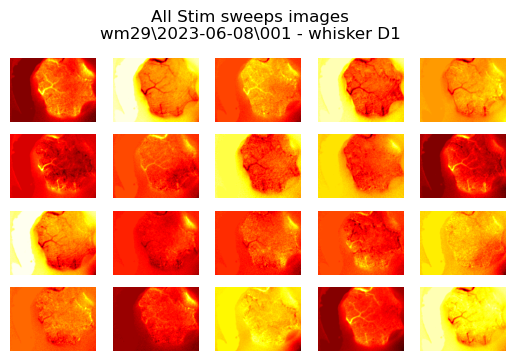

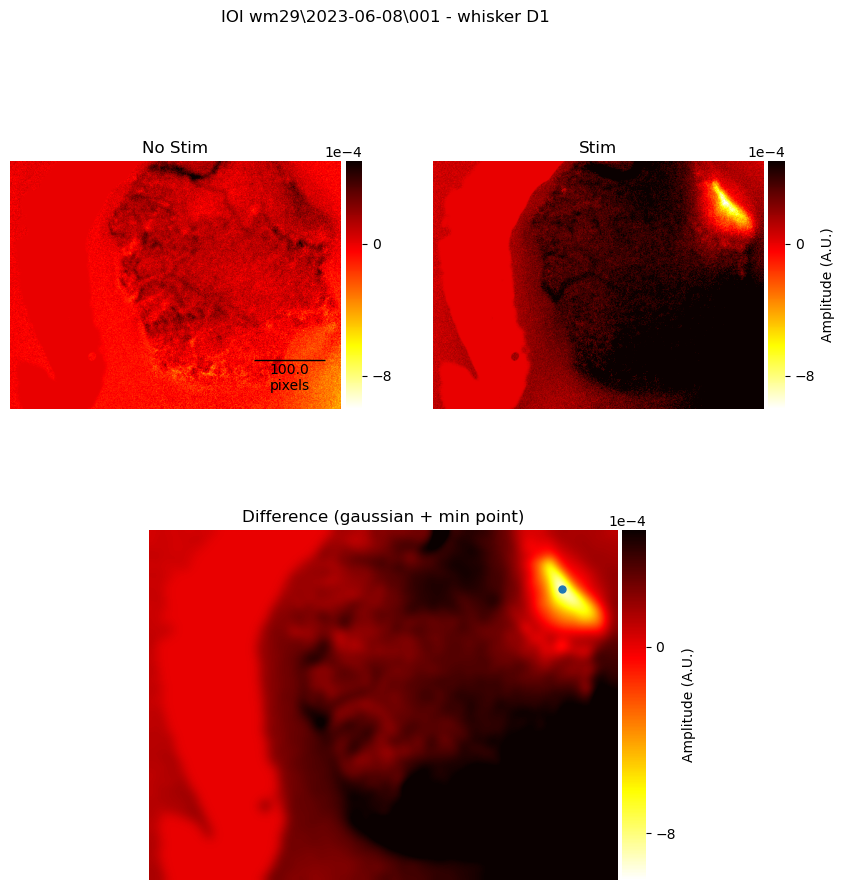

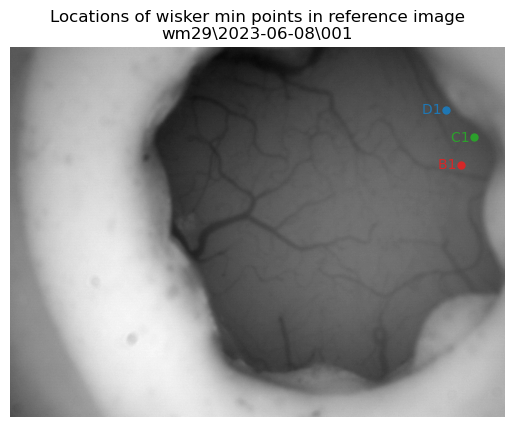

In [168]:
session_label = r"wm29\2023-06-08\001"
root = r"\\cajal\cajal_data2\ONE\Adaptation\{session}\intrinsic_optical_imaging\{whisker}"

#whiskers = ["Beta","Gamma","Delta"]
whiskers = ["B1","C1","D1"]
reference_whisker = whiskers[0]

whisker_root = root + r"\{whisker}_export.tdms"
ref_root = root + r"\reference"

reference = Inflow.tiff.Reader(ref_root.format(**{"whisker":reference_whisker, "session" : session_label}))._interleaved_data()
reference = np.flip(reference[:1038,:1388],axis = 0) # matching reference with the FOV of the itrinsic. They still have a 3X resolution ratio

#vemes = [{'vmin' : -0.0015, 'vmax' : 0.0005},{'vmin' : -0.002, 'vmax' : 0.0005},{'vmin' : -0.0025, 'vmax' : 0.0005}]
vemes = [{},{},{}]
use_diff = [True, True, True]
forced_centers = [ None, None, None ]
selections = [{}, {}, {}]

centers = {}
for whisker, vs, diff, point, selector in zip(whiskers, vemes, use_diff, forced_centers, selections) : 
    print(whisker)
    data = Inflow.tdms.read(whisker_root.format(**{"whisker":whisker, "session" : session_label}),"data_as_sweeps" )
    fig = show_all_sweeps(data["nostim_baseline_substracted"], whisker, session_label, "No stim")
    fig.savefig(f"fig.IOI_nostims.{whisker}.svg")
    fig.savefig(f"fig.IOI_nostims.{whisker}.png")
    fig = show_all_sweeps(data["stim_baseline_substracted"], whisker, session_label, "Stim")   
    fig.savefig(f"fig.IOI_stims.{whisker}.svg")
    fig.savefig(f"fig.IOI_stims.{whisker}.png")
    fig = IOI_plot(data, whisker, session_label, **vs, use_difference = diff, min_center = point, **selector)
    fig.savefig(f"fig.IOI_summary.{whisker}.svg")
    fig.savefig(f"fig.IOI_summary.{whisker}.png")
    fig.show()
    centers[whisker] = fig.center
    
fig, ax = plt.subplots()
ax.imshow(reference, cmap = "gray")
for (whisker, center), color in zip(centers.items(), ["tab:red","tab:green","tab:blue"] ) :
    ax.plot(center[0]*3,center[1]*3, 'o', markersize = 5, color = color)
    ax.text(center[0]*3,center[1]*3, whisker + " ", va= 'center', ha = 'right', color = color)
ax.set_title(f"Locations of wisker min points in reference image\n{session_label}")
Inflow.plots.utils.clarify_image_ax(ax)
fig.savefig(f"fig.IOI_pinpointed_locations.svg")
fig.savefig(f"fig.IOI_pinpointed_locations.png")
fig.show()